In [1]:
# Install packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [4, 3.5]


# Exploratory data analysis

Let's read the data and do some EDA

In [2]:
df = pd.read_csv('data/diabetes_risk_prediction_dataset.csv')
df.head().T

,0,1,2,3,4
Age,40,58,41,45,60
Gender,Male,Male,Male,Male,Male
Polyuria,No,No,Yes,No,Yes
Polydipsia,Yes,No,No,No,Yes
sudden weight loss,No,No,No,Yes,Yes
weakness,Yes,Yes,Yes,Yes,Yes
Polyphagia,No,No,Yes,Yes,Yes
Genital thrush,No,No,No,Yes,No
visual blurring,No,Yes,No,No,Yes
Itching,Yes,No,Yes,Yes,Yes


In [3]:
# Number of rows and columns
df.shape 

(520, 17)

In [4]:
# Check the number of missing values: there are no missing values
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [5]:
# Column names
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [6]:
# Standardize column name formats
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [8]:
# Data types of each column
df.dtypes

age                    int64
gender                object
polyuria              object
polydipsia            object
sudden_weight_loss    object
weakness              object
polyphagia            object
genital_thrush        object
visual_blurring       object
itching               object
irritability          object
delayed_healing       object
partial_paresis       object
muscle_stiffness      object
alopecia              object
obesity               object
class                 object
dtype: object

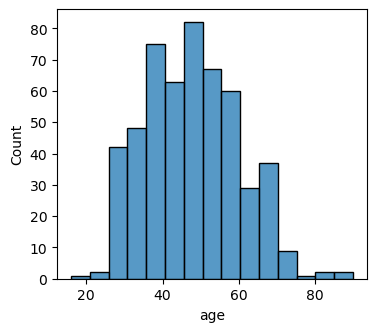

In [9]:
numerical_columns = list(df.dtypes[df.dtypes == 'int64'].index)

for nn in numerical_columns:
    plot = sns.histplot(data = df, x=nn, bins=15)
    #plot.bar_label(plot.containers[0])

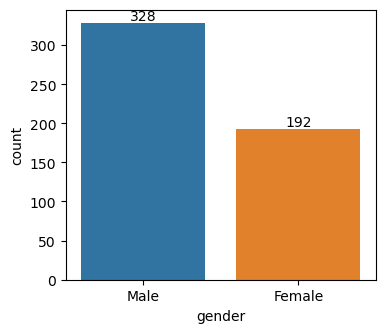

['Male' 'Female']
2


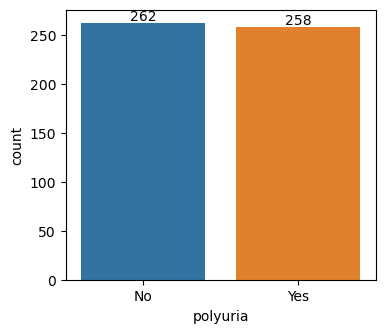

['No' 'Yes']
2


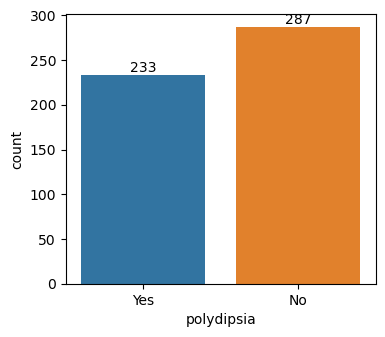

['Yes' 'No']
2


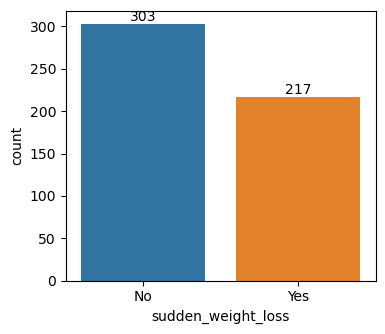

['No' 'Yes']
2


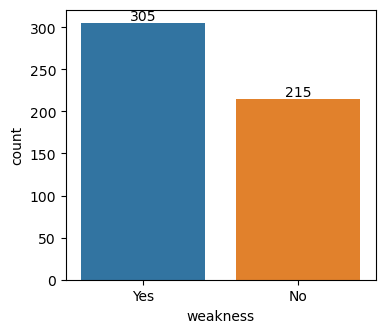

['Yes' 'No']
2


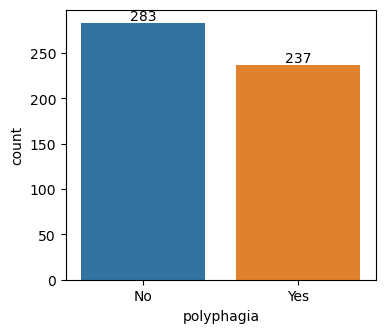

['No' 'Yes']
2


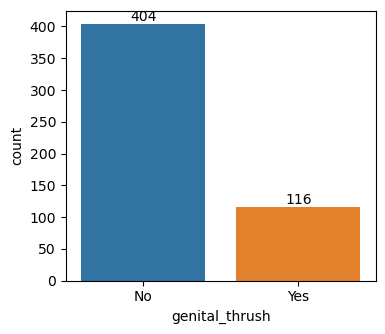

['No' 'Yes']
2


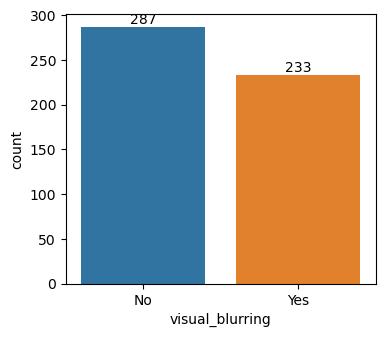

['No' 'Yes']
2


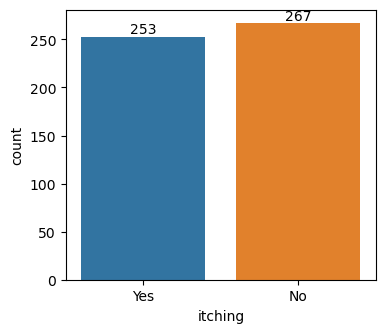

['Yes' 'No']
2


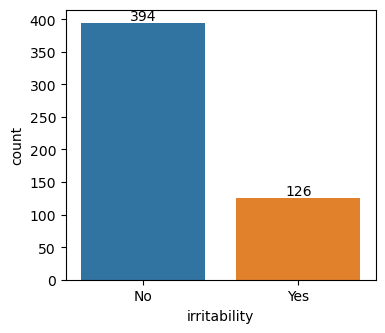

['No' 'Yes']
2


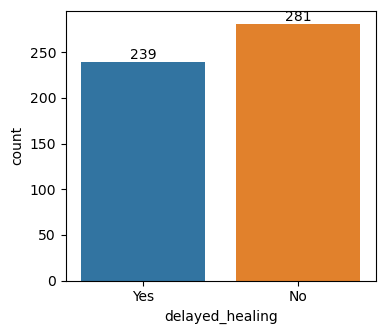

['Yes' 'No']
2


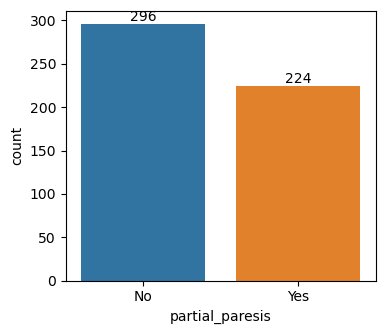

['No' 'Yes']
2


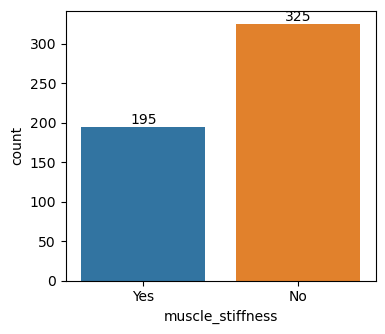

['Yes' 'No']
2


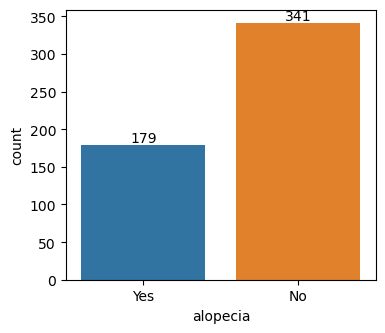

['Yes' 'No']
2


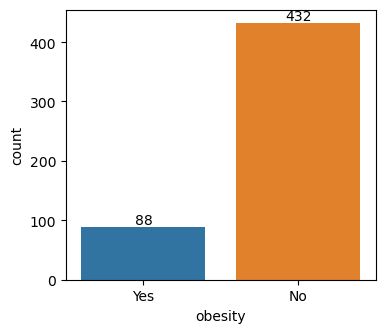

['Yes' 'No']
2


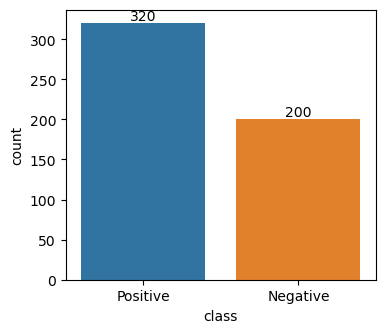

['Positive' 'Negative']
2


In [10]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    plot = sns.countplot(data = df, x=c)
    plot.bar_label(plot.containers[0])
    plt.show()
    print(df[c].unique())
    print(df[c].nunique())


As a result of EDA, we can say that the data set is pretty nice and clean :)  
Let's have a look at the feature importances for the categorical variables using mutual information score:

In [11]:
from sklearn.metrics import mutual_info_score

In [12]:
def mutual_info_class_score(series):
    return mutual_info_score(series, df['class'])

In [13]:
mi = df[categorical_columns].apply(mutual_info_class_score)
mi.sort_values(ascending=False)[1:]

polyuria              0.251093
polydipsia            0.248879
gender                0.113274
sudden_weight_loss    0.103121
partial_paresis       0.100266
polyphagia            0.060888
irritability          0.050512
alopecia              0.035464
visual_blurring       0.032305
weakness              0.029574
muscle_stiffness      0.007606
genital_thrush        0.006270
obesity               0.002669
delayed_healing       0.001105
itching               0.000090
dtype: float64

<Axes: xlabel='class', ylabel='age'>

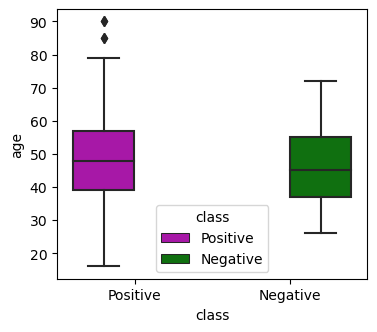

In [14]:
# Plot age distribution for each value of class (target variable):
sns.boxplot(x="class", y="age",
            hue="class", palette=["m", "g"],
            data=df)

In [15]:
# Convert the target variable from (Positive, Negative) to (1,0).
df['class'] = (df['class'] == 'Positive').astype(int)
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index) # Note that now the target variable is not included in categorical columns.

# Split data set into training, validation, and test sets

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)


In [18]:
len(df_train), len(df_val), len(df_test)

(312, 104, 104)

In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['class'].values
y_val = df_val['class'].values
y_test = df_test['class'].values

In [20]:
# Delete target variable from the matrix of predictors

del df_train['class']
del df_val['class']
del df_test['class']

In [21]:
df_full_train = df_full_train.reset_index(drop=True)

In [22]:
# Distribution of the target variable in the full training data set
df_full_train['class'].value_counts(normalize=True)

1    0.610577
0    0.389423
Name: class, dtype: float64

# One-hot encoding for the categorical variables

In [23]:
from sklearn.feature_extraction import DictVectorizer

In [24]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_columns + numerical_columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical_columns + numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [25]:
dv.get_feature_names_out()

array(['age', 'alopecia=No', 'alopecia=Yes', 'delayed_healing=No',
       'delayed_healing=Yes', 'gender=Female', 'gender=Male',
       'genital_thrush=No', 'genital_thrush=Yes', 'irritability=No',
       'irritability=Yes', 'itching=No', 'itching=Yes',
       'muscle_stiffness=No', 'muscle_stiffness=Yes', 'obesity=No',
       'obesity=Yes', 'partial_paresis=No', 'partial_paresis=Yes',
       'polydipsia=No', 'polydipsia=Yes', 'polyphagia=No',
       'polyphagia=Yes', 'polyuria=No', 'polyuria=Yes',
       'sudden_weight_loss=No', 'sudden_weight_loss=Yes',
       'visual_blurring=No', 'visual_blurring=Yes', 'weakness=No',
       'weakness=Yes'], dtype=object)

# Model 1: Logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [27]:
model = LogisticRegression(solver='lbfgs',C=1, max_iter=1000)
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000)

In [28]:
y_pred_train = model.predict_proba(X_train)[:, 1] # Prediction for training set

In [29]:
y_pred = model.predict_proba(X_val)[:, 1] # Prediction for validation set

In [30]:
roc_auc_score(y_val, y_pred >= 0.5)

0.9358974358974359

Let's check the accuracy for different values of threshold to determine whether a person has diabetes or not depending on the predicted probability greater than the threshold:

In [31]:
from sklearn.metrics import accuracy_score
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.625
0.05 0.702
0.10 0.817
0.15 0.856
0.20 0.875
0.25 0.875
0.30 0.865
0.35 0.894
0.40 0.923
0.45 0.923
0.50 0.933
0.55 0.923
0.60 0.913
0.65 0.913
0.70 0.913
0.75 0.913
0.80 0.913
0.85 0.885
0.90 0.885
0.95 0.817
1.00 0.375


0.5 seems to be the threshold yielding maximum AUC score.

In [32]:
auc = roc_auc_score(y_train, y_pred_train >= 0.5)
print('train AUC:', auc)

auc = roc_auc_score(y_val, y_pred >= 0.5)
print('val AUC:', auc)

train AUC: 0.9412182217060265
val AUC: 0.9358974358974359


# Model 2: Decision tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import export_text

In [34]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.9025641025641025

In [36]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [37]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [38]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.9141824751580848
val: 0.8830374753451677


### Parameter tuning for max_depth

In [39]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.833
   2 -> 0.883
   3 -> 0.944
   4 -> 0.984
   5 -> 0.956
   6 -> 0.934
  10 -> 0.923
  15 -> 0.918
  20 -> 0.923
None -> 0.926


### Parameter tuning for min_samples_leaf
3, 4, 5 gives the highest AUC scores. For these values, let's optimize the min_samples_leaf parameter

In [40]:
scores = []

for depth in [3, 4, 5]:
    for s in [1, 5, 10, 15, 20, 50, 100]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [41]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [42]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             3      4      5
min_samples_leaf                     
1                 0.944  0.984  0.918
5                 0.944  0.954  0.956
10                0.940  0.959  0.960
15                0.923  0.931  0.933
20                0.896  0.906  0.903
50                0.895  0.895  0.895
100               0.833  0.833  0.833

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

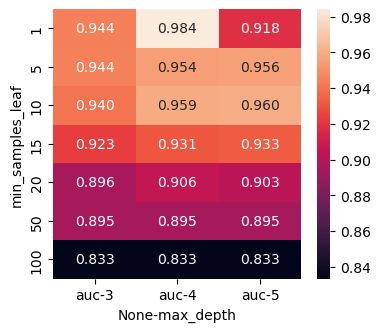

In [43]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")  

We see that max_depth=4 and min_samples_leaf=1 gives the highest AUC score. Let's train the model with these settings:

In [44]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [45]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train AUC:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val AUC:', auc)

train AUC: 0.9832451499118167
val AUC: 0.9698224852071007


# Model 3: Random forest

In [46]:
from sklearn.ensemble import RandomForestClassifier


### Hyperparameter tuning for n_estimators and max_depth:

In [47]:
scores = []

for d in [5, 10, 15,20]:
    for n in range(10, 501, 100):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [48]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

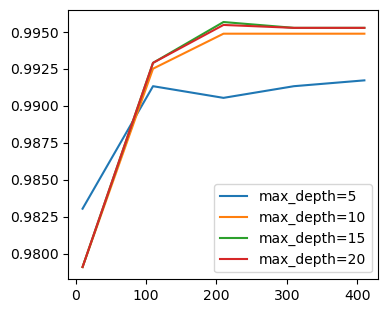

In [49]:
for d in [5, 10, 15, 20]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

Let's set max_depth = 15 and optimize for min_samples_leaf for each value of n_estimator:

In [50]:
max_depth=15
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 501, 100):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [51]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

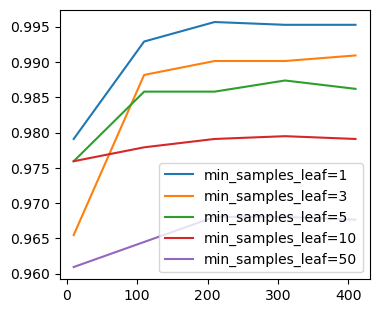

In [52]:
values = [1, 3, 5, 10, 50]

for s in zip(values):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='min_samples_leaf=%d' % s)

plt.legend()

min_samples_leaf=1 and n_estimators=250  seem to be a good choice. Let's train the model with these settings for the last time:

In [53]:
min_samples_leaf = 1
n_estimators=250
rf = RandomForestClassifier(n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=250, random_state=1)

In [54]:
y_pred = rf.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train AUC:', auc)

y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val AUC:', auc)

train AUC: 1.0
val AUC: 0.9950690335305719


# Selecting the final model

At this point, it makes sense to choose the random forest as our model since it yields an AUC score very close to 1.  
Now, let's train the final random forest model with full training data (train + validation)

In [55]:
y_full_train = df_full_train['class'].values
del df_full_train['class']

dv = DictVectorizer(sparse=False)

full_train_dict = df_full_train[categorical_columns + numerical_columns].to_dict(orient='records')
X_full_train = dv.fit_transform(full_train_dict)

test_dict = df_test[categorical_columns + numerical_columns].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [56]:
max_depth = 15
min_samples_leaf = 1
rf = RandomForestClassifier(n_estimators=250,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_full_train, y_full_train)

RandomForestClassifier(max_depth=15, n_estimators=250, random_state=1)

In [57]:
y_pred = rf.predict_proba(X_full_train)[:, 1]
auc = roc_auc_score(y_full_train, y_pred)
print('train AUC:', auc)

y_pred = rf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print('test AUC:', auc)

train AUC: 1.0
test AUC: 0.9990031897926634


Let's again check the accuracy for different threshold values to decide if a person has diabetes or not depending on prob>threshold.

In [58]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_test, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.635
0.05 0.933
0.10 0.962
0.15 0.962
0.20 0.962
0.25 0.962
0.30 0.981
0.35 0.981
0.40 0.981
0.45 0.981
0.50 0.981
0.55 0.981
0.60 0.971
0.65 0.971
0.70 0.981
0.75 0.981
0.80 0.952
0.85 0.933
0.90 0.894
0.95 0.846
1.00 0.606


A threshold of 0.5 seems to work fine also for our final random forest model.  
  
For curiousity, below I tried XGBoost model, however the extra time and effort spent for training its hyperparameters was not worth it as we already have achieved a very high AUC score with the random forest model.

So, from here, we can move on to creating the train.py file which can be used to train our final random forest model, to perform 5-fold cross validation, and to measure the performance of the model in the test data, and finally to save the final model using pickle.

# Extra: XGBoost

In [59]:
!pip install xgboost

In [60]:
import xgboost as xgb

In [61]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [62]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)


In [63]:
y_pred = model.predict(dval)

In [64]:
roc_auc_score(y_val, y_pred)

0.9859960552268245

In [65]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [66]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [67]:
s = output.stdout

In [68]:
print(s[:200])

[0]	train-auc:0.98013	val-auc:0.97771
[5]	train-auc:0.99501	val-auc:0.98501
[10]	train-auc:0.99923	val-auc:0.98540
[15]	train-auc:0.99991	val-auc:0.98895
[20]	train-auc:1.00000	val-auc:0.99014
[25]	tr


In [69]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [70]:
parse_xgb_output(output)

,num_iter,train_auc,val_auc
0,0,0.98013,0.97771
1,5,0.99501,0.98501
2,10,0.99923,0.98540
3,15,0.99991,0.98895
4,20,1.00000,0.99014
5,25,1.00000,0.99053
6,30,1.00000,0.99329
7,35,1.00000,0.99329
8,40,1.00000,0.99329
9,45,1.00000,0.99290


In [71]:
df_score = parse_xgb_output(output)

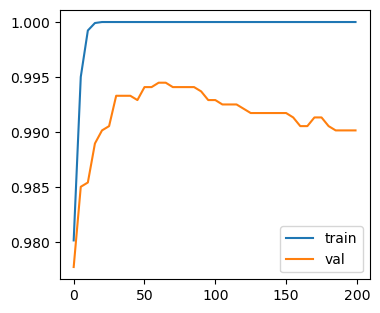

In [72]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

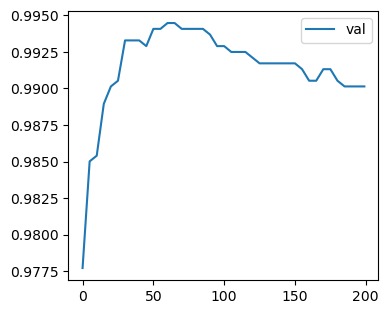

In [73]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [74]:
scores = {}

In [75]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [76]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
scores

{'eta=0.01':     num_iter  train_auc  val_auc
 0          0    0.98013  0.97771
 1          5    0.98081  0.97771
 2         10    0.98247  0.98008
 3         15    0.98247  0.98008
 4         20    0.98247  0.98008
 5         25    0.98277  0.98087
 6         30    0.98329  0.98126
 7         35    0.98329  0.98284
 8         40    0.98337  0.98205
 9         45    0.98432  0.98028
 10        50    0.98400  0.98028
 11        55    0.98456  0.98067
 12        60    0.98494  0.98225
 13        65    0.98525  0.98225
 14        70    0.98516  0.98185
 15        75    0.98529  0.98185
 16        80    0.98529  0.98107
 17        85    0.98574  0.98107
 18        90    0.98574  0.98107
 19        95    0.98557  0.98028
 20       100    0.98557  0.98185
 21       105    0.98604  0.98225
 22       110    0.98621  0.98264
 23       115    0.98621  0.98264
 24       120    0.99060  0.98166
 25       125    0.99062  0.98245
 26       130    0.99140  0.98245
 27       135    0.99191  0.98205
 2

In [77]:
scores.keys()

dict_keys(['eta=0.01'])

scores['eta=0.01']

In [78]:
%%capture output

xgb_params = {
    'eta': 0.05, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)


In [79]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
scores['eta=0.05']

,num_iter,train_auc,val_auc
0,0,0.98013,0.97771
1,5,0.98303,0.98185
2,10,0.98432,0.98028
3,15,0.98559,0.98146
4,20,0.98604,0.98067
5,25,0.99073,0.98126
6,30,0.99228,0.98047
7,35,0.99419,0.98107
8,40,0.99617,0.98521
9,45,0.99703,0.98383


In [80]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)


In [81]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
scores['eta=0.1']

,num_iter,train_auc,val_auc
0,0,0.98013,0.97771
1,5,0.98430,0.98028
2,10,0.98621,0.98264
3,15,0.99262,0.98087
4,20,0.99656,0.98540
5,25,0.99768,0.98580
6,30,0.99837,0.98462
7,35,0.99897,0.98619
8,40,0.99923,0.98698
9,45,0.99974,0.98619


In [82]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)


In [83]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
scores['eta=0.3']

,num_iter,train_auc,val_auc
0,0,0.98013,0.97771
1,5,0.99501,0.98501
2,10,0.99923,0.98540
3,15,0.99991,0.98895
4,20,1.00000,0.99014
5,25,1.00000,0.99053
6,30,1.00000,0.99329
7,35,1.00000,0.99329
8,40,1.00000,0.99329
9,45,1.00000,0.99290


In [84]:
%%capture output

xgb_params = {
    'eta': 1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)


In [85]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
scores['eta=1']

,num_iter,train_auc,val_auc
0,0,0.98013,0.97771
1,5,0.99996,0.99487
2,10,1.00000,0.99448
3,15,1.00000,0.99369
4,20,1.00000,0.99329
5,25,1.00000,0.99290
6,30,1.00000,0.99290
7,35,1.00000,0.99172
8,40,1.00000,0.99093
9,45,1.00000,0.99053


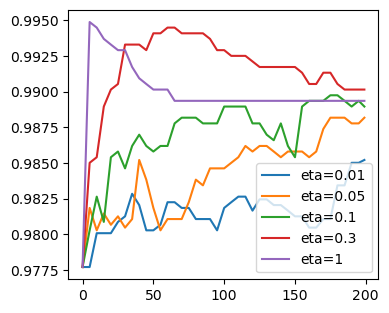

In [86]:

etas=['eta=0.01','eta=0.05','eta=0.1','eta=0.3','eta=1']

for eta in etas:
    df_score=scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()



Set eta=0.3 and train max_depth

In [87]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)


In [88]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
scores['max_depth=6']

,num_iter,train_auc,val_auc
0,0,0.98013,0.97771
1,5,0.99501,0.98501
2,10,0.99923,0.98540
3,15,0.99991,0.98895
4,20,1.00000,0.99014
5,25,1.00000,0.99053
6,30,1.00000,0.99329
7,35,1.00000,0.99329
8,40,1.00000,0.99329
9,45,1.00000,0.99290


In [89]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [90]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
scores['max_depth=3']

,num_iter,train_auc,val_auc
0,0,0.95627,0.94517
1,5,0.98445,0.97377
2,10,0.99236,0.97949
3,15,0.99664,0.98462
4,20,0.99837,0.98619
5,25,0.99931,0.98501
6,30,0.99948,0.98462
7,35,0.99957,0.98462
8,40,0.99970,0.98501
9,45,0.99978,0.98343


In [91]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 4,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [92]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
scores['max_depth=4']

,num_iter,train_auc,val_auc
0,0,0.97645,0.97219
1,5,0.98611,0.97416
2,10,0.99819,0.98343
3,15,0.99974,0.98304
4,20,0.99991,0.98146
5,25,1.00000,0.98225
6,30,1.00000,0.98225
7,35,1.00000,0.98225
8,40,1.00000,0.98107
9,45,1.00000,0.98107


In [93]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [94]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
scores['max_depth=10']

,num_iter,train_auc,val_auc
0,0,0.98013,0.97771
1,5,0.99501,0.98501
2,10,0.99923,0.98540
3,15,0.99991,0.98895
4,20,1.00000,0.99014
5,25,1.00000,0.99053
6,30,1.00000,0.99053
7,35,1.00000,0.99211
8,40,1.00000,0.99290
9,45,1.00000,0.99132


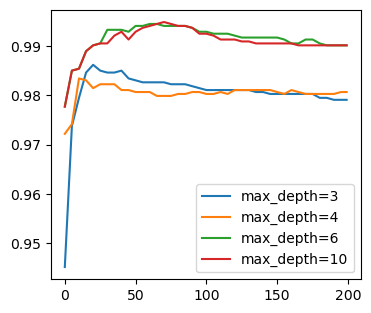

In [95]:
max_depths=['max_depth=3','max_depth=4','max_depth=6','max_depth=10']

for max_depth in max_depths:
    df_score=scores[max_depth]
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
plt.legend()

Set max_depth=6 and train for min_child_weight

In [96]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [97]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
scores['min_child_weight=1']

,num_iter,train_auc,val_auc
0,0,0.98013,0.97771
1,5,0.99501,0.98501
2,10,0.99923,0.98540
3,15,0.99991,0.98895
4,20,1.00000,0.99014
5,25,1.00000,0.99053
6,30,1.00000,0.99329
7,35,1.00000,0.99329
8,40,1.00000,0.99329
9,45,1.00000,0.99290


In [98]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 5,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [99]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
scores['min_child_weight=5']

,num_iter,train_auc,val_auc
0,0,0.93683,0.90158
1,5,0.98262,0.97653
2,10,0.98690,0.98166
3,15,0.98849,0.98126
4,20,0.99239,0.98245
5,25,0.99312,0.98284
6,30,0.99393,0.98402
7,35,0.99402,0.98245
8,40,0.99449,0.98166
9,45,0.99492,0.98166


In [100]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [101]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
scores['min_child_weight=10']

,num_iter,train_auc,val_auc
0,0,0.90031,0.88323
1,5,0.96279,0.97337
2,10,0.97043,0.96785
3,15,0.97425,0.96568
4,20,0.97460,0.96529
5,25,0.97376,0.96529
6,30,0.97453,0.96529
7,35,0.97492,0.96568
8,40,0.97484,0.96489
9,45,0.97496,0.96489


In [102]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 15,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [103]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
scores['min_child_weight=15']

,num_iter,train_auc,val_auc
0,0,0.88833,0.85306
1,5,0.95376,0.95365
2,10,0.95595,0.95621
3,15,0.96055,0.95464
4,20,0.96178,0.95187
5,25,0.96238,0.95266
6,30,0.96359,0.95266
7,35,0.96324,0.95424
8,40,0.96406,0.95503
9,45,0.96380,0.95424


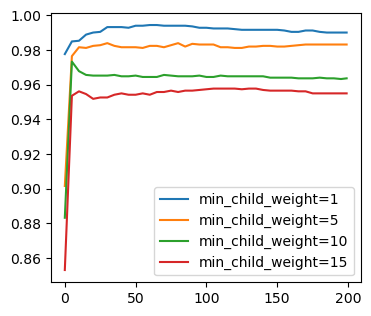

In [104]:
min_child_weights=['min_child_weight=1','min_child_weight=5','min_child_weight=10','min_child_weight=15']

for min_child_weight in min_child_weights:
    df_score=scores[min_child_weight]
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
plt.legend()

Set min_child_weight=1 and train the final model

In [105]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=75)

In [106]:
y_pred = model.predict(dtrain)
auc=roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = model.predict(dval)
auc=roc_auc_score(y_val, y_pred)
print('val:', auc)


train: 1.0
val: 0.9944773175542406
